In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

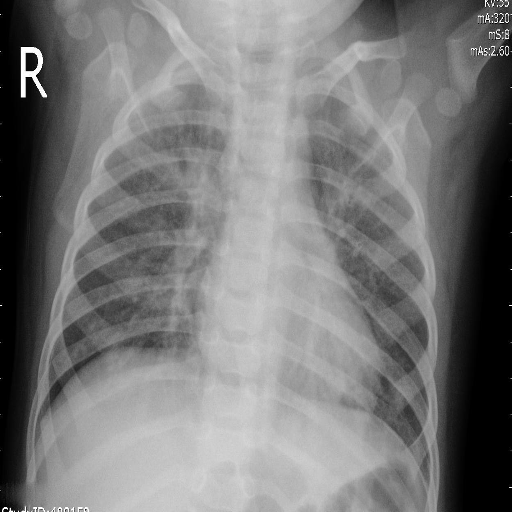

In [2]:
# Sample Image after resizing it to (512 x 512)

img = Image.open('D:/X Ray/Type A/TypeA_1.png')
array = np.asarray(img)
img = img.resize((512,512))
img

In [3]:
array.shape

(1024, 1024)

## Preprocessing

### Check if all images are of the correct size

In [4]:
# Setting current directory:
os.chdir('D:/X Ray')

folders = ['Type A','Type B','Type C','NORMAL']

In [5]:
summary = pd.DataFrame(columns=["Images","Not PNG","Correct Size","Wrong Size","With 3rd Dimension"])

wrongSizeLog = {}
with3rdDimensionLog = {}

# Initiating the above dictionaries for each disease as a key
for dir in folders:
    wrongSizeLog[dir] = []
    with3rdDimensionLog[dir] = []

    
for dir in folders:
    images = 0
    notPng = 0
    correctSize = 0
    wrongSize = 0
    with3rdDimension = 0
        
    for filename in os.listdir(dir):
        images += 1
        shape = np.asarray(Image.open(dir+'/'+filename)).shape
        
        # Check the format of the image 
        if not filename.endswith(".png"): 
            notPng += 1
        
        # Check the shape of the images
        if len(shape) == 3:
            with3rdDimension += 1
            with3rdDimensionLog[dir].append((filename,shape))
            shape = shape[0:2]
        
        # Check the size of the images 
        if shape == (1024,1024):
            correctSize += 1
        else:
            wrongSize += 1
            wrongSizeLog[dir].append((filename,shape))
            

    summary.at[dir] = [images,notPng,correctSize,wrongSize,with3rdDimension]
    
summary

,Images,Not PNG,Correct Size,Wrong Size,With 3rd Dimension
Type A,642.0,0.0,642.0,0.0,96.0
Type B,252.0,0.0,243.0,9.0,242.0
Type C,284.0,0.0,284.0,0.0,0.0
NORMAL,1211.0,0.0,1211.0,0.0,0.0


### Handling 3 Dimension

In [6]:
with3rdDimensionLog['Type A'][0:5]

[('TypeA_103.png', (1024, 1024, 3)),
 ('TypeA_108.png', (1024, 1024, 3)),
 ('TypeA_115.png', (1024, 1024, 3)),
 ('TypeA_116.png', (1024, 1024, 3)),
 ('TypeA_117.png', (1024, 1024, 3))]

In [116]:
with3rdDimensionLog['Type B'][0:5]

[('TypeB_1.png', (1024, 1024, 3)),
 ('TypeB_10.png', (1024, 1024, 3)),
 ('TypeB_100.png', (1024, 1024, 3)),
 ('TypeB_102.png', (1024, 1024, 3)),
 ('TypeB_103.png', (1024, 1024, 3))]

In [140]:
# Visualizing same image with Different Color mapping
def displayImageToGrayScale(imgName):
    img = Image.open(imgName)
    imgGray = img.convert('L')
    fig, axarr = plt.subplots(2,3,figsize=(10,10))
    axarr[0,0].imshow(img)
    axarr[0,1].imshow(imgGray,cmap = 'binary') 
    axarr[0,2].imshow(imgGray,cmap = 'Greys') 
    axarr[1,0].imshow(imgGray,cmap = 'gray') 
    axarr[1,1].imshow(imgGray,cmap = 'gist_gray') 
    axarr[1,2].imshow(img.convert('L'),cmap = 'binary')
    fig.set_figheight(5)
    fig.tight_layout(pad=0.0)

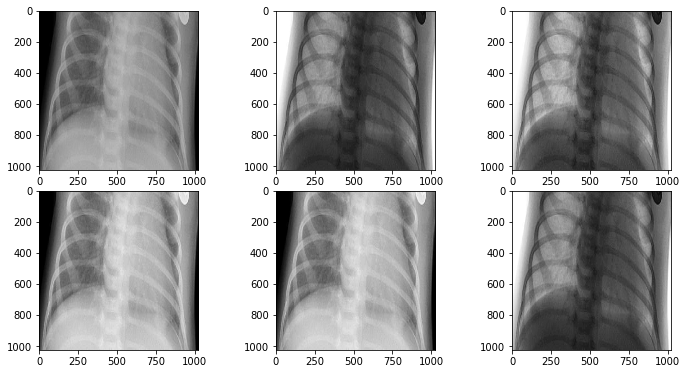

In [143]:
# Visualizing a random X-Ray from Type A Disease

displayImageToGrayScale('Type A/TypeA_103.png')

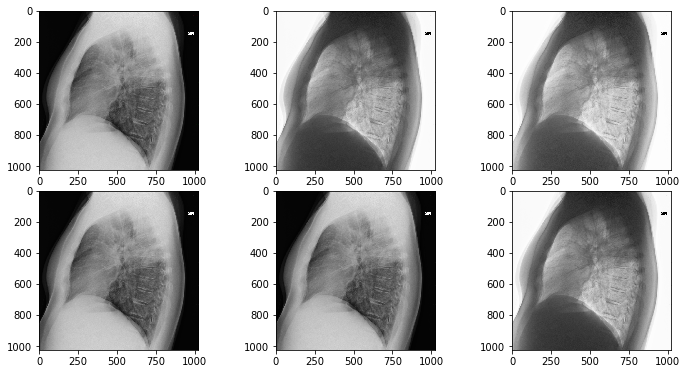

In [141]:
# Visualizing a random X-Ray from Type B Disease

displayImageToGrayScale('Type B/TypeB_1.png')

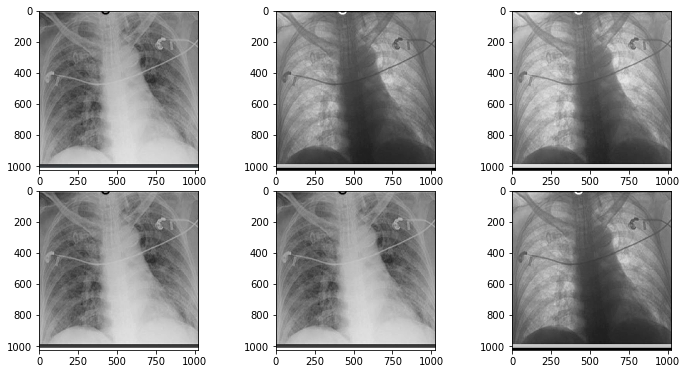

In [144]:
displayImageToGrayScale('Type B/TypeB_103.png')

In [145]:
#Original Image
img = Image.open('Type B/TypeB_1.png')
np.asarray(img)[0]

array([[6, 6, 6],
       [5, 5, 5],
       [5, 5, 5],
       ...,
       [9, 2, 5],
       [6, 3, 4],
       [6, 4, 7]], dtype=uint8)

In [146]:
#After conversion to Single Channel Image
np.asarray(img.convert('L'))[0]

array([6, 5, 5, ..., 4, 4, 5], dtype=uint8)

In [147]:
#Compare to Image originally with only 1 channel
img = Image.open('Type A/TypeA_1.png')
np.asarray(img)[0]

array([ 1,  1,  1, ..., 74, 71, 67], dtype=uint8)

### Handling Wrong Size

In [112]:
wrongSizeLog

{'Type A': [],
 'Type B': [('TypeB_12.png', (1117, 1153)),
  ('TypeB_14.png', (1160, 1154)),
  ('TypeB_17.png', (1038, 1138)),
  ('TypeB_2.png', (2119, 2141)),
  ('TypeB_25.png', (901, 981)),
  ('TypeB_30.png', (1840, 1955)),
  ('TypeB_4.png', (2173, 2282)),
  ('TypeB_41.png', (1090, 1063)),
  ('TypeB_53.png', (1118, 1110))],
 'Type C': [],
 'NORMAL': []}

In [159]:
def euclNorm(vector):
    sum = 0
    for i in vector:
        sum += i**2
        
    return np.sqrt(sum)

def euclDistance(vector1,vector2):
    difference = np.subtract(vector1,vector2)
    return euclNorm(difference)

In [162]:
# Find image with biggest difference:
def findBiggestDifference(list):
    distances = []
    images = []
    for line in list:
        images.append(line[0])
        distances.append(euclDistance(line[1],(1024,1024)))
    
    return images[np.argmax(distances)]
        
findBiggestDifference(wrongSizeLog['Type B'])

'TypeB_4.png'

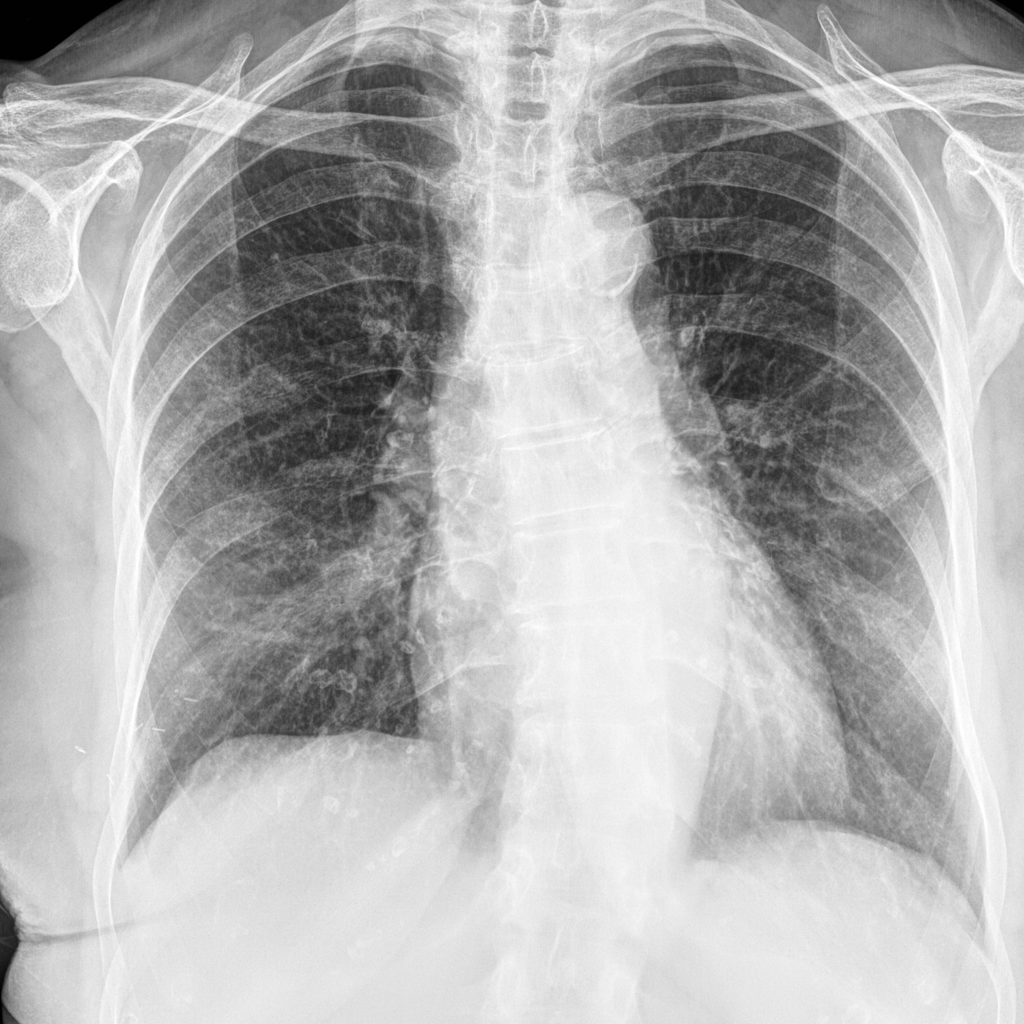

In [167]:
#Resizing seems to work fine:
img = Image.open('Type B/TypeB_4.png')
img = img.resize((1024,1024))
img

### Try PCA

"I understand that 1024x1024 is a large dimensionality for the feature space, and you may explore
dimensionality reduction techniques, or down-sampling methods to reduce the size of the
images for your machine learning purposes. Note that if you just simply pass the raw data
to a training module, it may take a long time to train the model, and might also limit the
CPU/GPU access of the other classmates using the cluster. Please explore ideas which allow
working with smaller feature sets."

In [169]:
#Original Dimensionality:
1024*1024

1048576

In [2]:
from sklearn.decomposition import PCA

In [3]:
#Sample images and vectorize them
i = 0
dir = 'Type A'
xTrain = []
for filename in os.listdir(dir):
    img = Image.open(dir+'/'+filename)
    array = np.asarray(img)
    shape = array.shape

    if len(shape) == 3:
        img = img.convert('L')

    if shape != (1024,1024):
        img = img.resize((1024,1024))

    array = np.asarray(img)
    
    xTrain.append(array.ravel())
    
    i+=1
    
    if i >= 50:
        break
        
xTrain = np.array(xTrain)
xTrain.shape

(50, 1048576)

In [185]:
xTrain[0]

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [4]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(xTrain)
explained = pca.explained_variance_ratio_
explCumulative = np.cumsum(explained)
explCumulative

array([0.19117234, 0.35469552, 0.44817578, 0.51153034, 0.56766317,
       0.61048989, 0.64250255, 0.67392062, 0.6994457 , 0.72158455,
       0.74360393, 0.76255227, 0.77878202, 0.79414125, 0.80704701,
       0.81977208, 0.83155507, 0.84244857, 0.85209579, 0.86157017,
       0.86996166, 0.87786279, 0.88542641, 0.89268433, 0.89958499,
       0.90611789, 0.91250369, 0.91853962, 0.92436513, 0.92998145,
       0.93529711, 0.9403158 , 0.94524013, 0.9499067 , 0.95443749,
       0.9588706 , 0.96303478, 0.967088  , 0.97108765, 0.97484254,
       0.97836372, 0.98173868, 0.98497752, 0.98811933, 0.99084862,
       0.99349229, 0.99589673, 0.9980615 , 1.        , 1.        ])

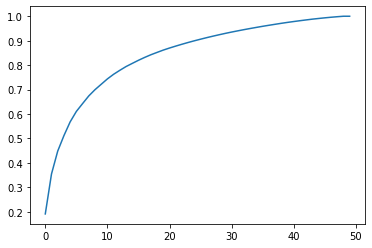

In [7]:
plt.plot(explCumulative)